In [ ]:
# Execute this cell to install dependencies
%pip install sf-hamilton[visualization]

# Exploring tracked experiments [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/experiment_management/notebook.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/experiment_management/notebook.ipynb)

This notebook shows how to load data from your local repository once you executed `run.py` a few times. Note that you will need to update `run_id` values to match your data.

In [1]:
import json
import pickle

import pandas as pd
from IPython.display import display, Image
from hamilton.plugins.h_experiments.cache import JsonCache

## Load cache created by the `ExperimentTracker` adapter

In [2]:
experiment_cache = JsonCache("./experiments")
experiment_cache.keys()

[b'ac6c1499-6674-4834-a46b-695c25ef77fc',
 b'a0bc0edf-b2b7-45cb-87d9-0af2358fe514',
 b'fdd3e8ea-973e-4d18-9853-c38a1dbc1a9b',
 b'12a38769-3e28-458c-9074-b58b67d2159b',
 b'5283272d-70ab-41e7-909e-300c85e18441',
 b'cfaa2ae9-e99c-448f-b584-2237a1b0cbca']

## Get experiment from cache

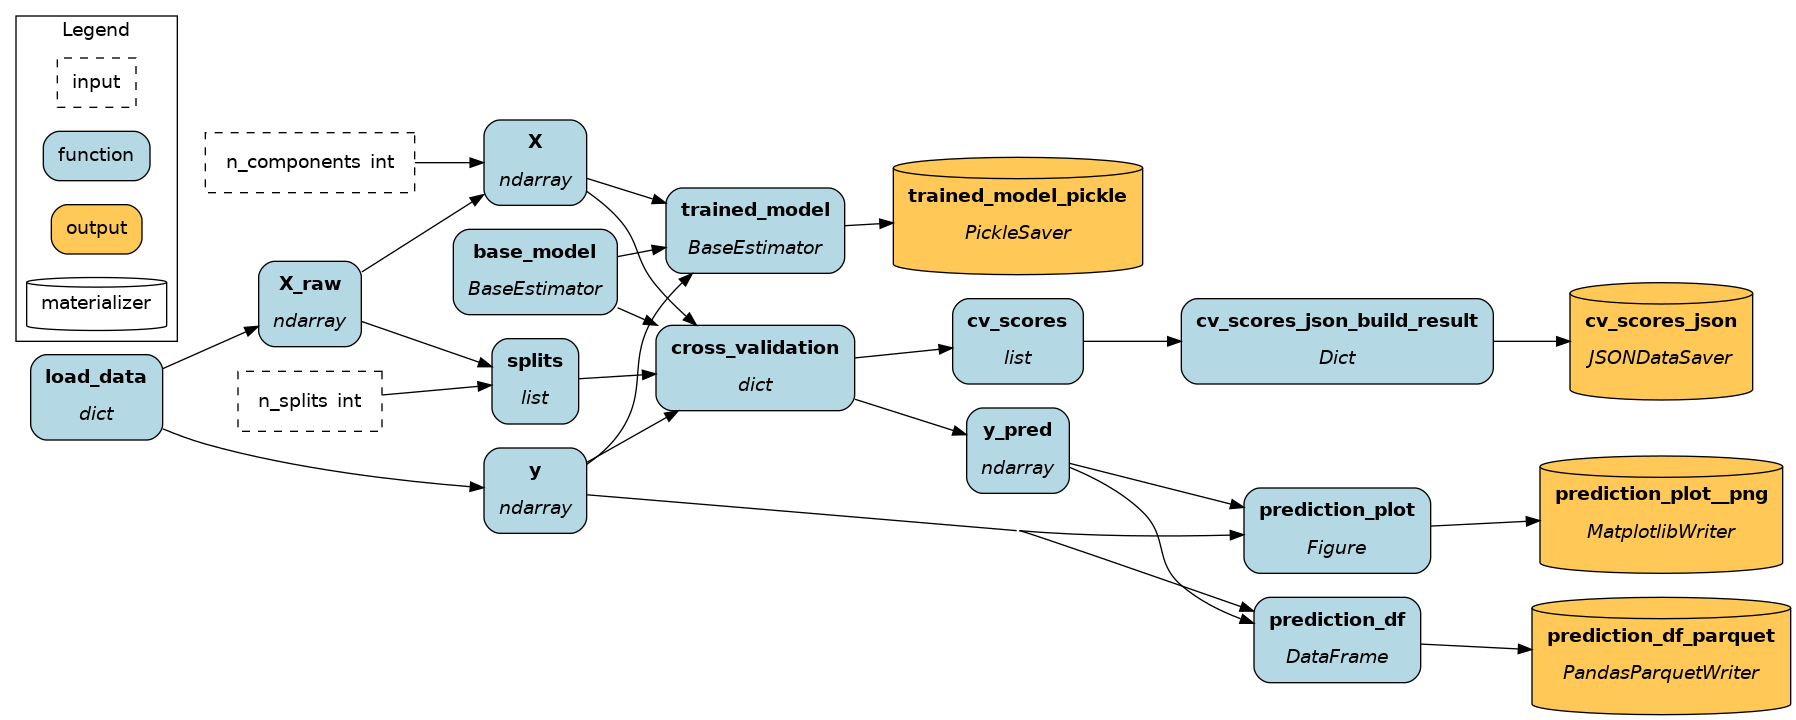

{'config': {'model': 'linear', 'preprocess': 'pca'},
 'date_completed': '2024-04-15T09:33:14.071273',
 'experiment': 'forecast',
 'graph_hash': 'e05e7ce996e5aea287f871cd118866b49b8c75cac8b1359085e85468b927b9c9',
 'inputs': [{'default_value': 5, 'name': 'n_components', 'value': 10},
  {'default_value': 3, 'name': 'n_splits', 'value': 3}],
 'materialized': [{'data_saver': 'PickleSaver',
   'path': '/home/tjean/projects/dagworks/hamilton/examples/experiment_management/experiments/forecast/cfaa2ae9-e99c-448f-b584-2237a1b0cbca/trained_model.pickle',
   'sink': 'pickle',
   'source_nodes': ['trained_model']},
  {'data_saver': 'PandasParquetWriter',
   'path': '/home/tjean/projects/dagworks/hamilton/examples/experiment_management/experiments/forecast/cfaa2ae9-e99c-448f-b584-2237a1b0cbca/prediction_df.parquet',
   'sink': 'parquet',
   'source_nodes': ['prediction_df']},
  {'data_saver': 'JSONDataSaver',
   'path': '/home/tjean/projects/dagworks/hamilton/examples/experiment_management/experime

In [3]:
run_id = b"cfaa2ae9-e99c-448f-b584-2237a1b0cbca"

experiment = json.loads(experiment_cache.read(run_id))

display(
    Image(filename=f"{experiment['run_dir']}/dag.png"),
    experiment,
)

## Load materialized values

In [4]:
experiment["materialized"][0]

{'data_saver': 'PickleSaver',
 'path': '/home/tjean/projects/dagworks/hamilton/examples/experiment_management/experiments/forecast/cfaa2ae9-e99c-448f-b584-2237a1b0cbca/trained_model.pickle',
 'sink': 'pickle',
 'source_nodes': ['trained_model']}

In [7]:
from sklearn.linear_model import LinearRegression

def load_artifact(materialize_info, strict = False):
    sink = materialize_info["sink"]
    path = materialize_info["path"]
    
    if sink == "pickle":
        artifact = pickle.load(open(path, "rb"))
    elif sink == "parquet":
        artifact = pd.read_parquet(path)
    else:
        if strict:
            raise TypeError(f"Can't load artifact of type {sink}")
        artifact = None
    
    return artifact


model = load_artifact(experiment["materialized"][0])
model

LinearRegression()